In [14]:
# Import dependencies
from ipynb.fs.full.Simulating_random_coin_flips_and_die_rolls_using_NumPy import *;
from ipynb.fs.full.Computing_probabilities_over_interval_ranges import *;

In [5]:
# Computing frequencies with 500 flips per sample
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [6]:
# Optimizing the coin-flip-frequency computation
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [7]:
# Converting a NumPy array to a Python list
assert head_count_array.tolist() == head_count_list

In [8]:
# Converting a Python list to a NumPy array
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array) == True

In [9]:
# Computing frequencies using NumPy
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000
                                    for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000,
                                        head_count_list))

In [10]:
# Printing a NumPy frequency array
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [11]:
# Finding the largest and smallest frequency values
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency observed: {min_freq}")
print(f"Maximum frequency observed: {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency observed: 0.656
Maximum frequency observed: 0.733
Difference across frequency range: 0.07699999999999996


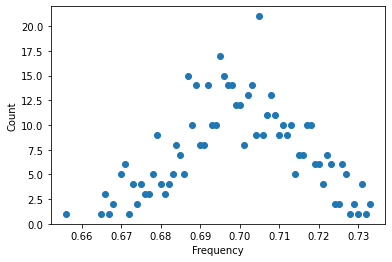

In [15]:
# Plotting measured frequencies
frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = [frequency_counts[freq] for freq in frequencies]

plt.scatter(frequencies, counts)
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

## Binning similar points in histogram plots

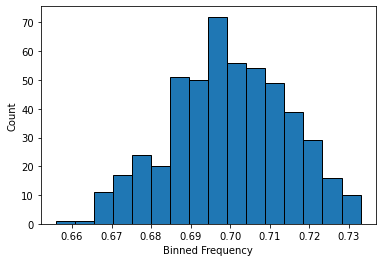

In [16]:
# Plotting a frequency histogram using plt.hist
plt.hist(frequency_array, bins='auto', edgecolor='black')
plt.xlabel('Binned Frequency')
plt.ylabel('Count')
plt.show()

Number of Bins: 16


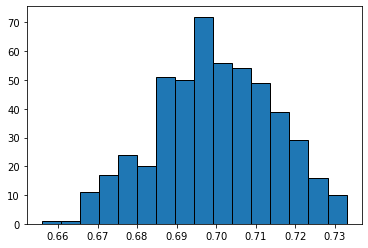

In [21]:
# Counting bins in a plotted histogram
counts, _, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


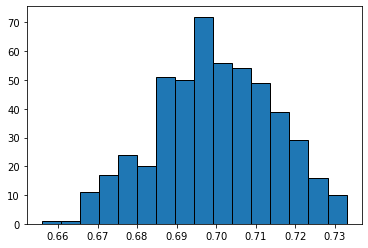

In [22]:
# Finding the width of bins in a histogram
ounts, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black')
bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [23]:
# Getting a bin’s frequency and size
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end = bin_edges[i], bin_edges[i+1]
    range_string = f"{range_start} - {range_end}"
    print((f"The bin for frequency range {range_string} contains "
        f"{count} element{'' if count == 1 else 's'}"))

output_bin_coverage(0)
output_bin_coverage(5)  

The bin for frequency range 0.656 - 0.6608125 contains 1 element
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements


In [24]:
# Finding the index of an array’s maximum value
assert counts[counts.argmax()] == counts.max()

In [25]:
# Using argmax to return a histogram’s peak
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements


## Deriving probabilities from histograms

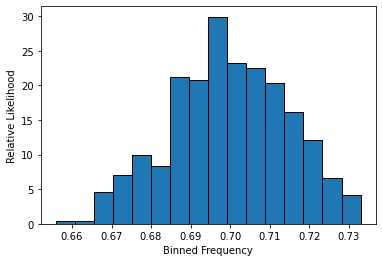

In [26]:
# Plotting a histogram’s relative likelihoods
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

In [27]:
# Computing the total area under a histogram
assert likelihoods.sum() * bin_width == 1.0

In [28]:
# Computing the probability of the peak frequencies
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index+1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144


In [29]:
# Increasing the probability of a frequency range
peak_index = likelihoods.argmax()
start_index, end_index = (peak_index - 1, peak_index + 2)
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464


In [30]:
# Computing a high confidence interval
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        area = likelihoods[start_index: end_index + 1].sum() * bin_width
        
    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"The frequency range {range_string} represents a "
           f"{100 * area:.2f}% confidence interval"))
    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.670438 - 0.723375 represents a 95.40% confidence interval


(3, 14)

## Shrinking the range of a high confidence interval

In [31]:
# Sampling 100,000 frequencies
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 100000)
frequency_array = head_count_array / 1000
assert frequency_array.size == 100000

The frequency range 0.670429 - 0.727857 represents a 95.42% confidence interval


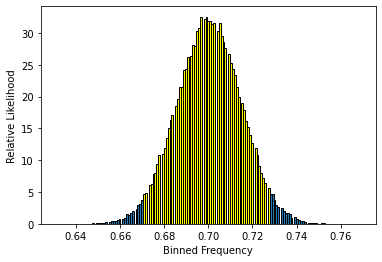

In [33]:
# Coloring histogram bars over an interval
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


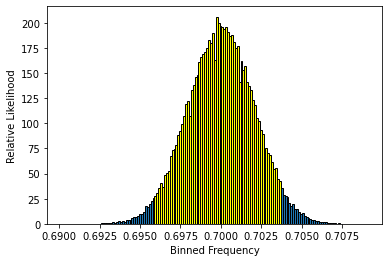

In [34]:
# Sampling 5 billion flipped coins
np.random.seed(0)
head_count_array = np.random.binomial(50000, 0.7, 100000)
frequency_array = head_count_array / 50000
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto', edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)
for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('Binned Frequency')
plt.ylabel('Relative Likelihood')
plt.show()

## Computing histograms in NumPy

In [35]:
# Computing a histogram using np.histogram
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.695769 - 0.703708 represents a 95.06% confidence interval


(47, 114)